In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
dataset = pd.read_csv("teen_phone_addiction_dataset.csv")
dataset


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [5]:
N = 4
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
target_col = cols[N % 7]
target = dataset[target_col]
target[0]

np.float64(3.6)

In [9]:
def target_stats(target) : 
    #returns stats of target for example mean, variance, median etc.
    res_dict = {}
    res_dict["mean"] = np.mean(target)
    res_dict["var"] = np.var(target)
    values, counts  = np.unique(target, return_counts=True)
    index_max = np.argmax(counts)
    res_dict["mod"] = values[index_max]
    res_dict["median"] = np.median(target)
    res_dict["quantile of level 0.25"] = np.quantile(target, 0.25)
    res_dict["quantile of level 0.5"] = np.quantile(target, 0.5)
    res_dict["quantile of level 0.75"] = np.quantile(target, 0.75)

    moment_4 = np.mean((target - res_dict["mean"])**4)
    res_dict["exc_kurt"] = moment_4 / (res_dict["var"]**2) - 3
    res_dict["asymm"] = stats.moment(target, 3) / (res_dict["var"]**1.5)
    res_dict["iqr"] = res_dict["quantile of level 0.75"] - res_dict["quantile of level 0.25"]

    return pd.DataFrame(res_dict.items(), columns=["Name of stat", "value"])
    

target_stats(target)

,Name of stat,value
0,mean,2.499233
1,var,0.976216
2,mod,2.700000
3,median,2.500000
4,quantile of level 0.25,1.800000
5,quantile of level 0.5,2.500000
6,quantile of level 0.75,3.200000
7,exc_kurt,-0.214874
8,asymm,0.066939
9,iqr,1.400000


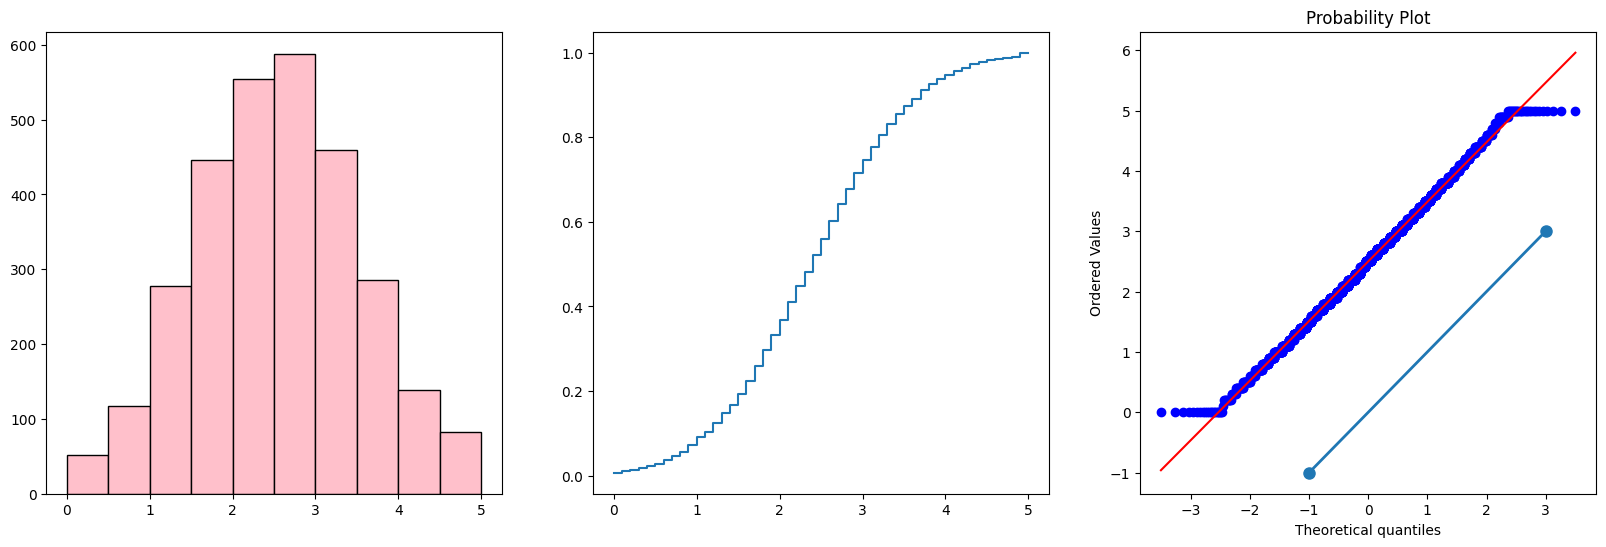

In [24]:
def target_vis(target) : 
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    #histograma
    axes[0].hist(target, edgecolor='black', color='pink')
    #empirical distribution function
   
    x_sorted = np.sort(target)
    unique_values, counts = np.unique(x_sorted, return_counts=True)
    
   
    cumulative_counts = np.cumsum(counts)
    
    y = cumulative_counts / len(target)
    
    axes[1].step(unique_values, y)
    #Q-Q Plot
    stats.probplot(target, dist="norm", plot=axes[2])
    plt.plot([-1,3], [-1,3], 'o-', linewidth=2, markersize=8)

target_vis(target)

In [25]:
from scipy.stats import norm, chi2
def pearson(target):
    N = len(target)
    bcnt = 1 + int(np.log2(N))

    counts, bins = np.histogram(target, bins=bcnt)
    intervals = np.column_stack((bins[:-1],bins[1:]))
    mean = np.mean(target)
    std = np.sqrt(np.var(target))

    cdf = np.vectorize(lambda x: norm.cdf(x, loc=mean, scale=std))
    cdfs = cdf(intervals)
    probs = cdfs[:, 1] - cdfs[:, 0]

    freqs = counts 
    es = N * probs

    value = np.sum(((freqs - es) ** 2 )/es)
    
    
    df = len(counts) - 3
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, df)
    if value > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."
    
def asymmetry(target):
    N = len(target)
    asymm = stats.moment(target, moment=3)/ (stats.moment(target, moment=2) ** 1.5)
    se = np.sqrt(6 / N)
    value = asymm / se 
    alpha = 0.05
    critical_value = norm.ppf(1 - alpha /2)
    if abs(value) > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."
    

def kurtosis(target):
    N = len(target)
    exc_kurt = stats.moment(target, moment=4)/ (stats.moment(target, moment=2) ** 2) - 3 
    se = np.sqrt(24 / N)
    value = exc_kurt / se 
    alpha = 0.05
    critical_value = norm.ppf(1 - alpha /2)
    if abs(value) > critical_value:
        return "Not normal!"
    else:
        return "Maybe, normal..."
    

def check_criteria(target) :
    res_dict = {}
    res_dict["pearson"] = pearson(target)
    res_dict["asymmetry"] = asymmetry(target)
    res_dict["kurtosis"] = kurtosis(target)
    return pd.DataFrame(res_dict.items(), columns=["criteria", "result"])
check_criteria(target)

    

,criteria,result
0,pearson,Not normal!
1,asymmetry,"Maybe, normal..."
2,kurtosis,Not normal!


In [ ]:
def transformed(target):
    eps = 1e-8
    vls, _ = stats.boxcox(eps + target)
    return vls
new_target = transformed(target)


3000

In [30]:
target_stats(new_target)

,Name of stat,value
0,mean,1.240454
1,var,0.625124
2,mod,1.443498
3,median,1.291732
4,quantile of level 0.25,0.729686
5,quantile of level 0.5,1.291732
6,quantile of level 0.75,1.809450
7,exc_kurt,0.299284
8,asymm,-0.370515
9,iqr,1.079764


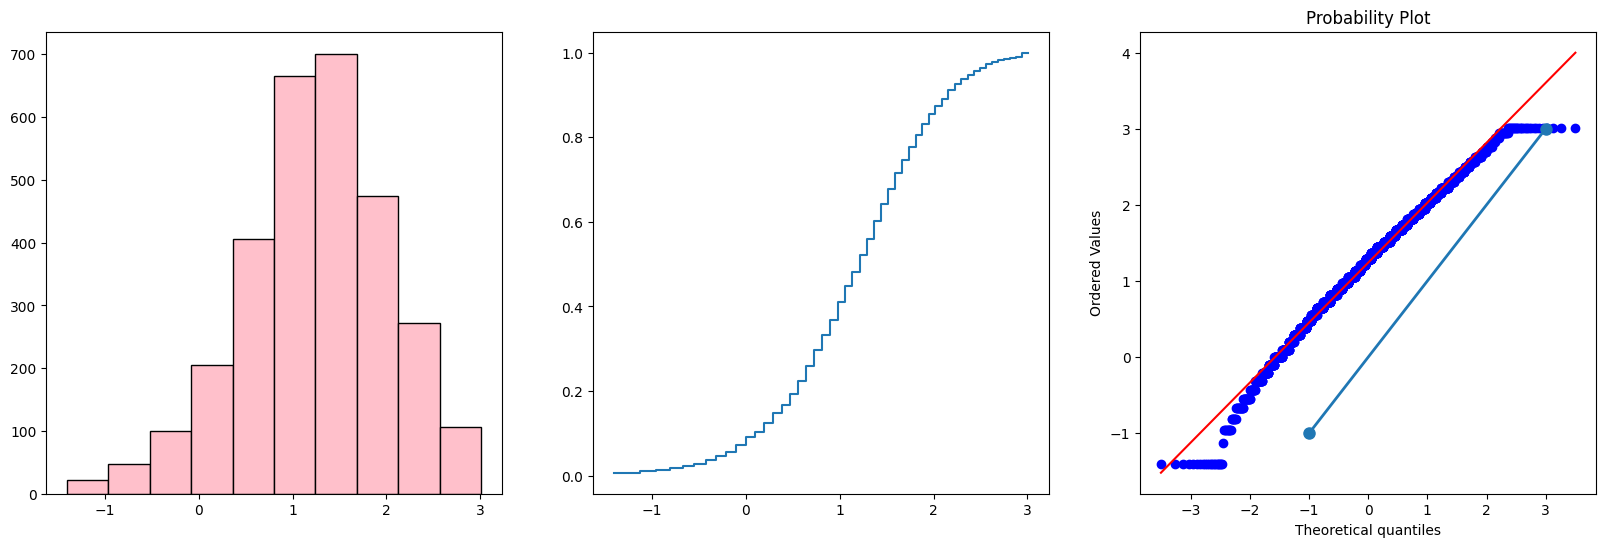

In [31]:
target_vis(new_target)

In [32]:
check_criteria(new_target)

,criteria,result
0,pearson,Not normal!
1,asymmetry,Not normal!
2,kurtosis,Not normal!


In [33]:
grouped = dataset.groupby('School_Grade')[target_col]

print(grouped.mean())
print(grouped.var())

School_Grade
10th    2.524025
11th    2.487891
12th    2.463894
7th     2.540040
8th     2.469917
9th     2.510456
Name: Time_on_Social_Media, dtype: float64
School_Grade
10th    0.922734
11th    0.945878
12th    1.013978
7th     0.919583
8th     1.030382
9th     1.025967
Name: Time_on_Social_Media, dtype: float64


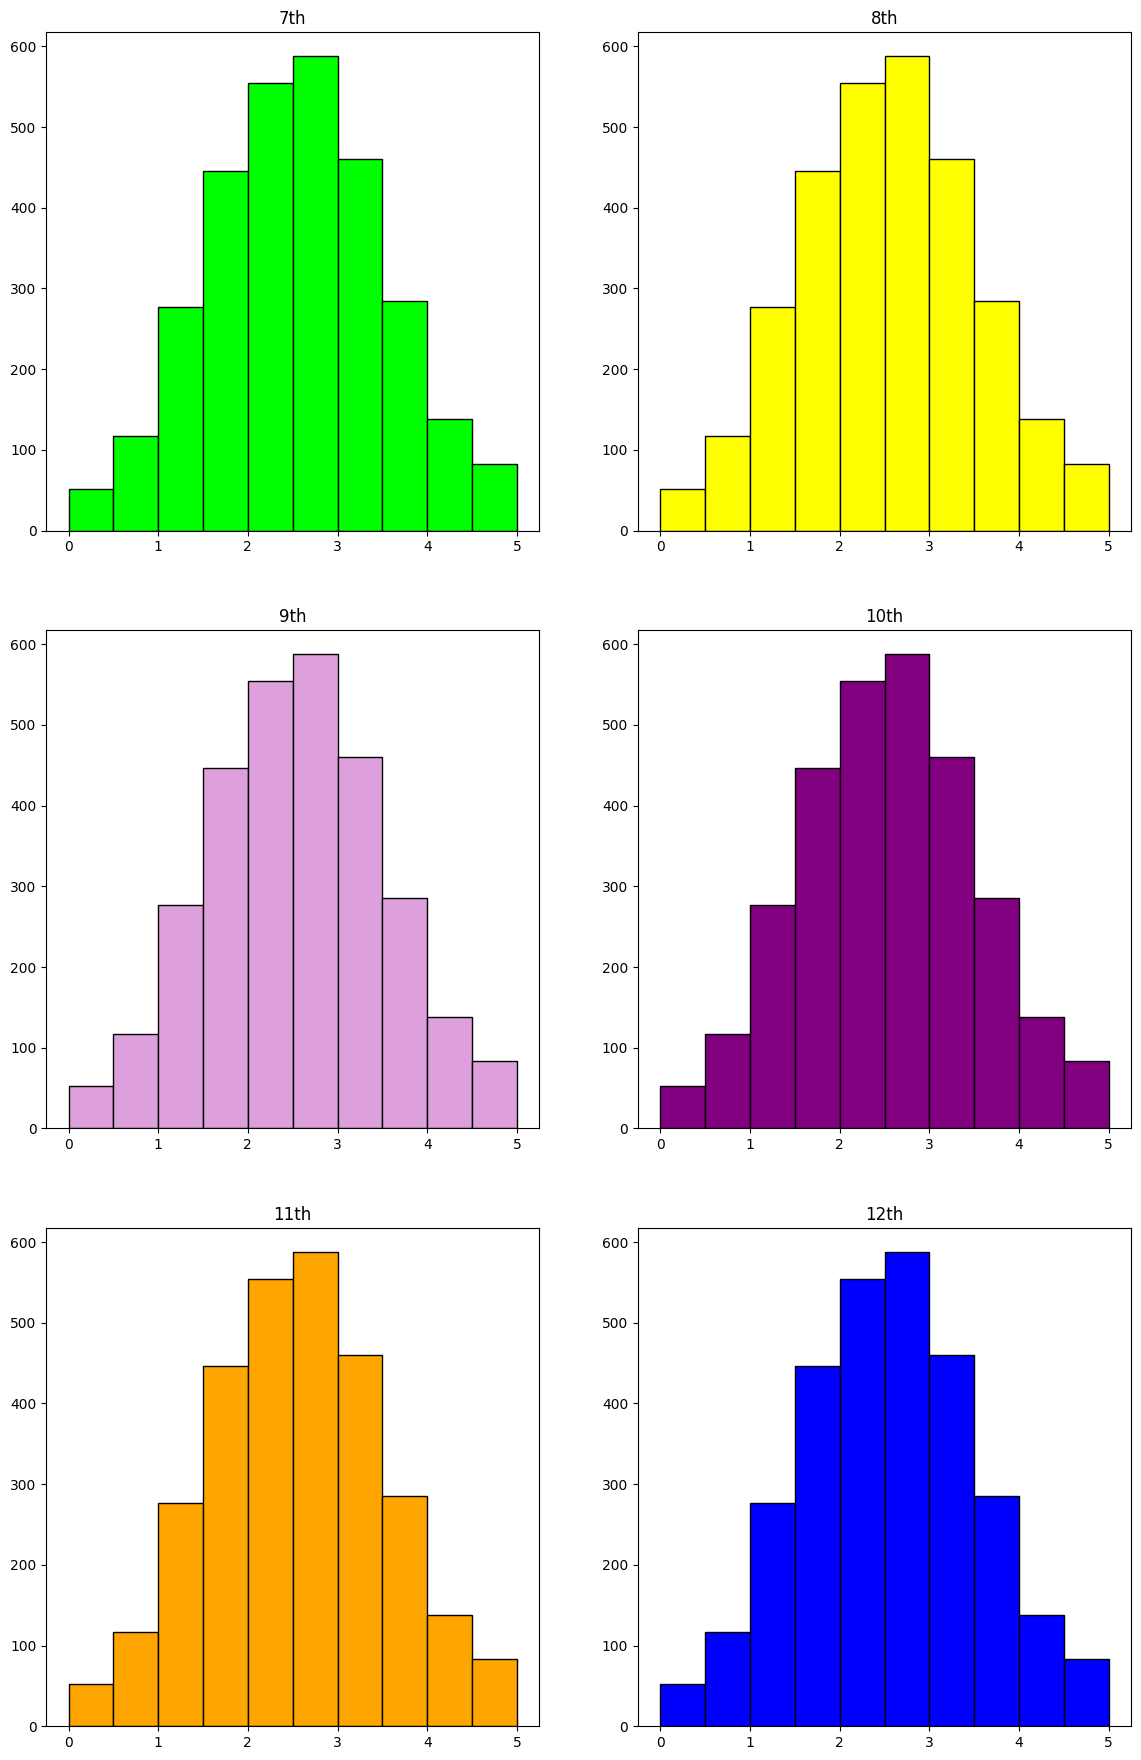

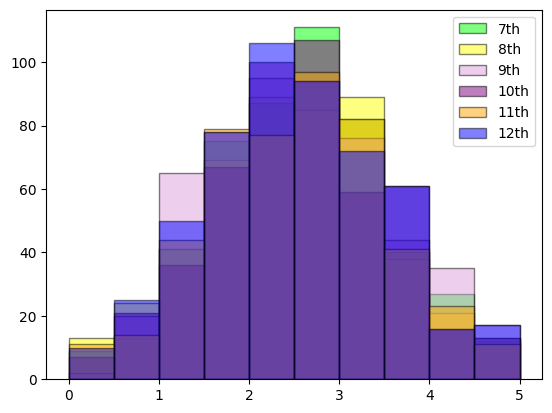

In [40]:
group_dict = grouped.apply(np.array).to_dict()
fig, axes = plt.subplots(3, 2, figsize = (14, 22))
axes = axes.flatten()
colors = ["lime", "yellow", "plum", "purple", "orange", "blue"]
ikv = [(i, kv[0], kv[1]) for i, kv in 
        enumerate(sorted(group_dict.items(), key = lambda x:int(x[0][:-2]))) ]

for i, k, v in ikv:
    axes[i].set_title(k)
    axes[i].hist(target, edgecolor='black', color=colors[i])

fig, ax = plt.subplots()
for i, k, v in ikv:
    ax.hist(v, color=colors[i], edgecolor='black', alpha=0.5, label=k)
ax.legend()
plt.show()